In [1]:
import cmath
import matplotlib.pyplot as plt
import numpy as np

Draw a signal:

$$
s(f) = sin(2.\pi.f.t)
$$

In [3]:
def create_signal(frequency, time):

    sin = np.sin(2 * np.pi * frequency * time)
    sin2 = np.sin(2 * np.pi * 2 * frequency * time)
    sin3 = np.sin(2 * np.pi * 3 * frequency * time)

    return  sin + sin2 + sin3

Centre of Gravity (weighted mean frequency):

$$
C = (\frac{1}{N}\sum{xi},\frac{1}{N}\sum{yi})
$$

In [4]:
def calculate_centre_of_gravity(mult_signal):

    x_centre = np.mean(
        [x.real for x in mult_signal]
    )

    y_centre = np.mean(
        [x.imag for x in mult_signal]
    )

    return x_centre, y_centre

Sum signals with puretone ~ Fourier Transform:

$$
\sum{puretone(f,t).signal(f,t)} = \int{s(t).e^{-i2\pi ft}dt}
$$

In [5]:
def calculate_sum(multi_signal):

    x_sum = np.sum(
        [x.real for x in multi_signal] # multi_signal are complex numbers
    )

    y_sum = np.sum(
        [x.imag for x in multi_signal] # multi_signal are complex numbers
    )

    return x_sum, y_sum

Pure tone (complex exponential):

$$
e^{-j2\pi ft} = cos(2\pi ft) - jsin(2\pi ft)
$$

$$
cos(-\theta) = cos(\theta)
$$

$$
sin(-\theta) = -sin(\theta)
$$

In [6]:
def create_pure_tone(frequency, time):

    angle = -2 * np.pi * frequency * time

    return np.cos(angle) + 1j * np.sin(angle)

Fourier Transform:

$$
\hat{s}(f) = \int{s(t).e^{-i2\pi ft}dt}
$$

In [25]:
def plot_fourier_transform(
        pure_tone_frequency,
        signal_frequency,
        time,
        plot_centre_of_gravity=False,
        plot_sum=False
):

    # Create sinusoid and signal
    pure_tone = create_pure_tone(pure_tone_frequency, time)

    signal = create_signal(signal_frequency, time)

    # Multiply pure tone and signal
    mult_signal = pure_tone * signal # complex numbers

    X = [x.real for x in mult_signal]
    Y = [x.imag for x in mult_signal]


    plt.figure(figsize=(15, 10))
    plt.plot(X, Y)


    # Calculate and plot centre of gravity
    if plot_centre_of_gravity:

        centre_of_gravity = calculate_centre_of_gravity(mult_signal)
        # Draw
        plt.plot([centre_of_gravity[0]],[centre_of_gravity[1]], marker='o', markersize=10, color='red')


    # Calculate and plot sum
    if plot_sum:

        integral = calculate_sum(mult_signal)
        # Draw
        plt.plot([integral[0]],[integral[1]], marker='o', markersize=10, color='green')


    # Set origin axes
    ax = plt.gca()
    ax.grid(True)
    ax.spines['left'].set_position('zero')
    ax.spines['right'].set_color('none')
    ax.spines['bottom'].set_position('zero')
    ax.spines['top'].set_color('none')


    if not plot_sum:
        plt.xlim(-3, 3)
        plt.ylim(-3, 3)


    plt.show()

In [9]:
def plot_signal(signal, time):
    plt.figure(figsize=(15, 10))
    plt.plot(signal, time)
    plt.xlabel("Time")
    plt.ylabel("Intensity")
    plt.show()

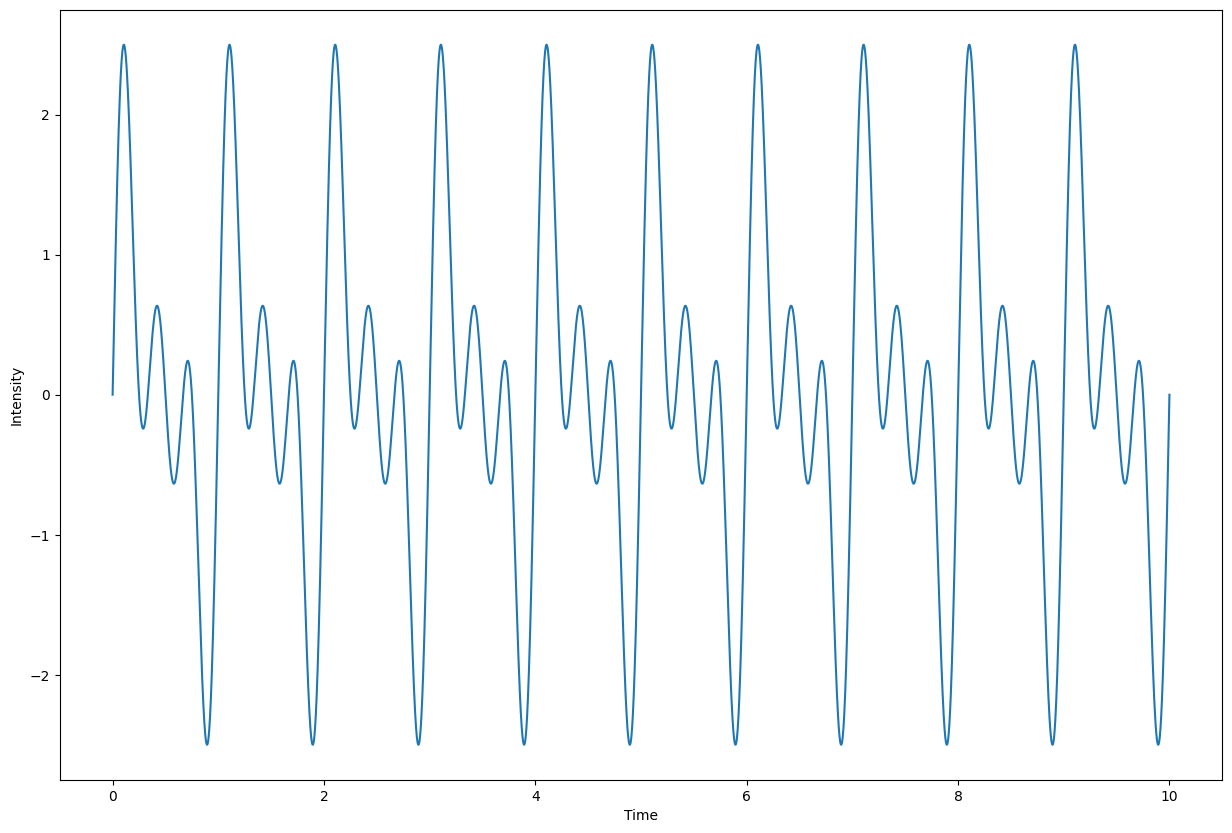

In [12]:
time = np.linspace(0, 10, 10000)
signal = create_signal(frequency=1, time=time)
plot_signal(time, signal)

- 1 signal has 3 frequencies: 1hz, 2hz, 3hz

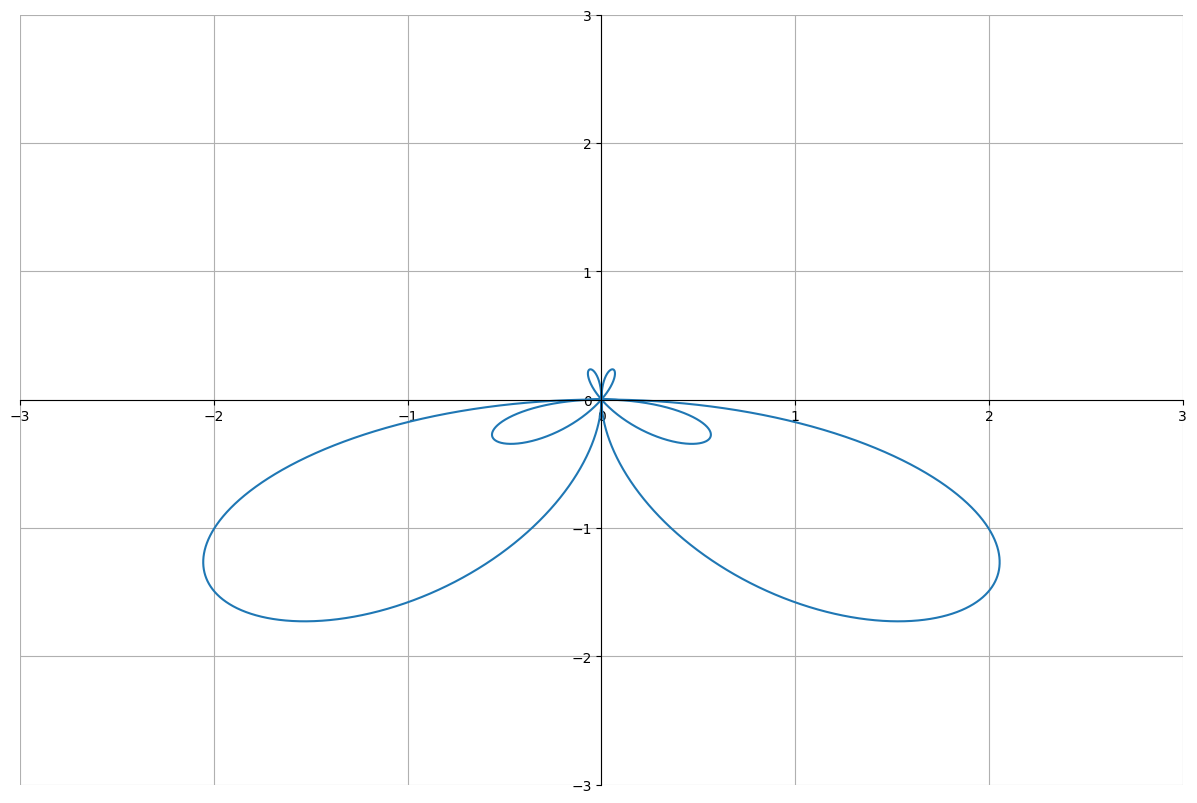

In [32]:
time = np.linspace(0, 1, 10000)
plot_fourier_transform(
    pure_tone_frequency=1.0,
    signal_frequency=1,
    time=time,
    plot_centre_of_gravity=False,
    plot_sum=False
)

- signal has 3 frequency (1Hz, 2Hz, 3Hz)
- puretone(1hz)
- harmonic blue lines: 2Hz(puretone(1hz).signal(2hz)), 3Hz(puretone(1hz).signal(3hz))

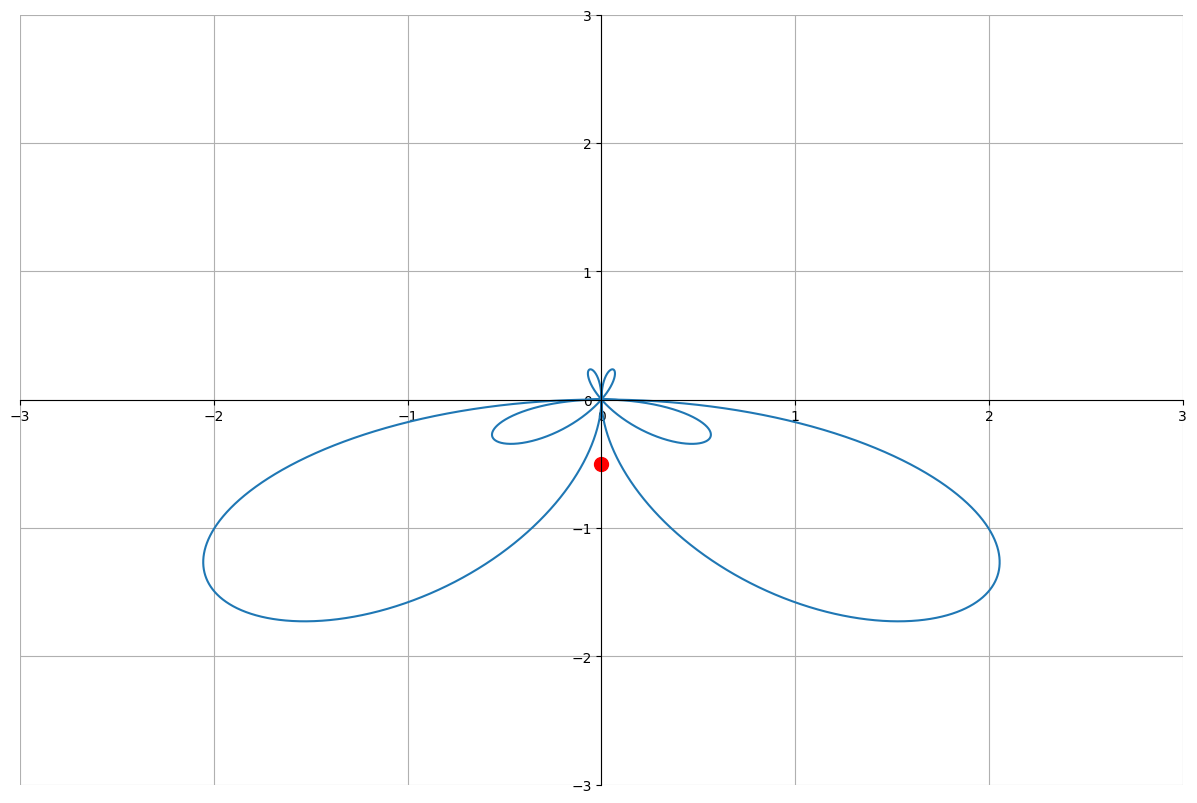

In [41]:
plot_fourier_transform(
    pure_tone_frequency=1,
    signal_frequency=1,
    time=time,
    plot_centre_of_gravity=True,
    plot_sum=False
)

- red dot: weighted mean frequency

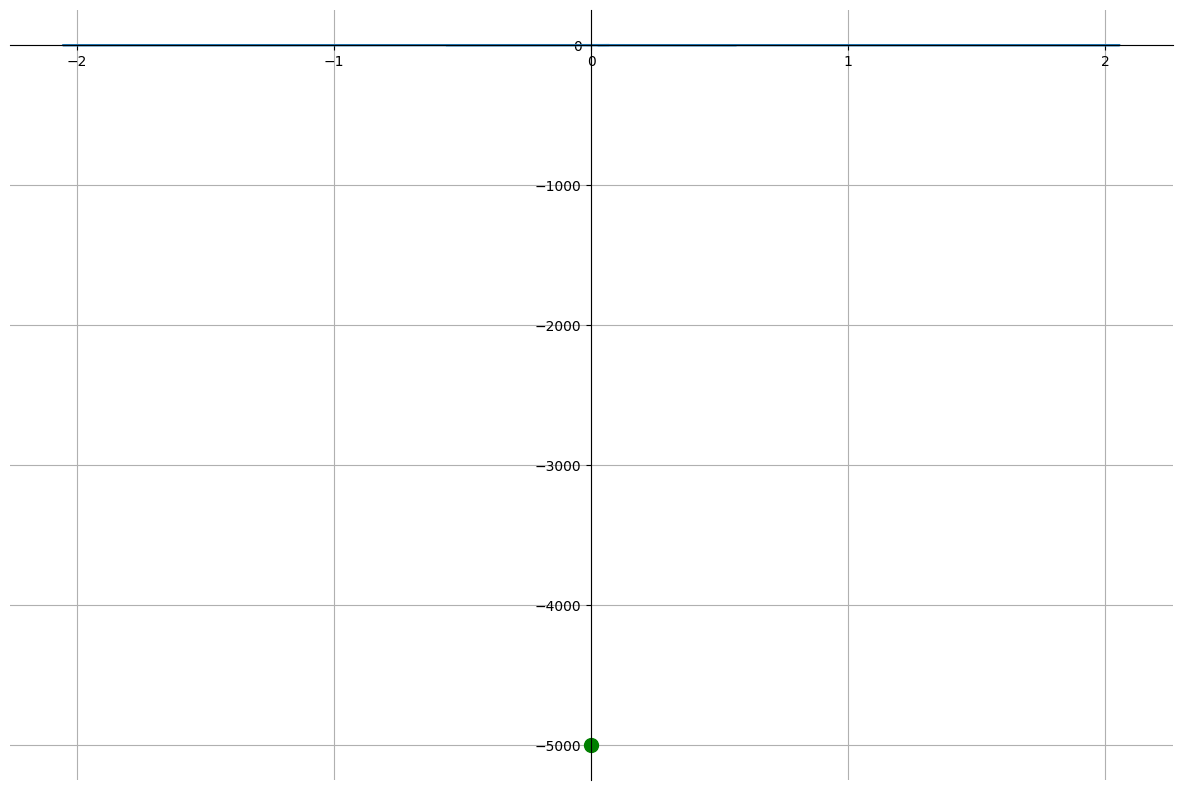

In [34]:
plot_fourier_transform(
    pure_tone_frequency=1.0,
    signal_frequency=1,
    time=time,
    plot_centre_of_gravity=False,
    plot_sum=True
)

- green dot: Fourier Transform at 1Hz